In [55]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score


# 1. EDA

In [43]:
data = pd.read_csv('./winequality-red.csv')
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Medidas de tendencia central para los datos

In [44]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Visualización de los datos

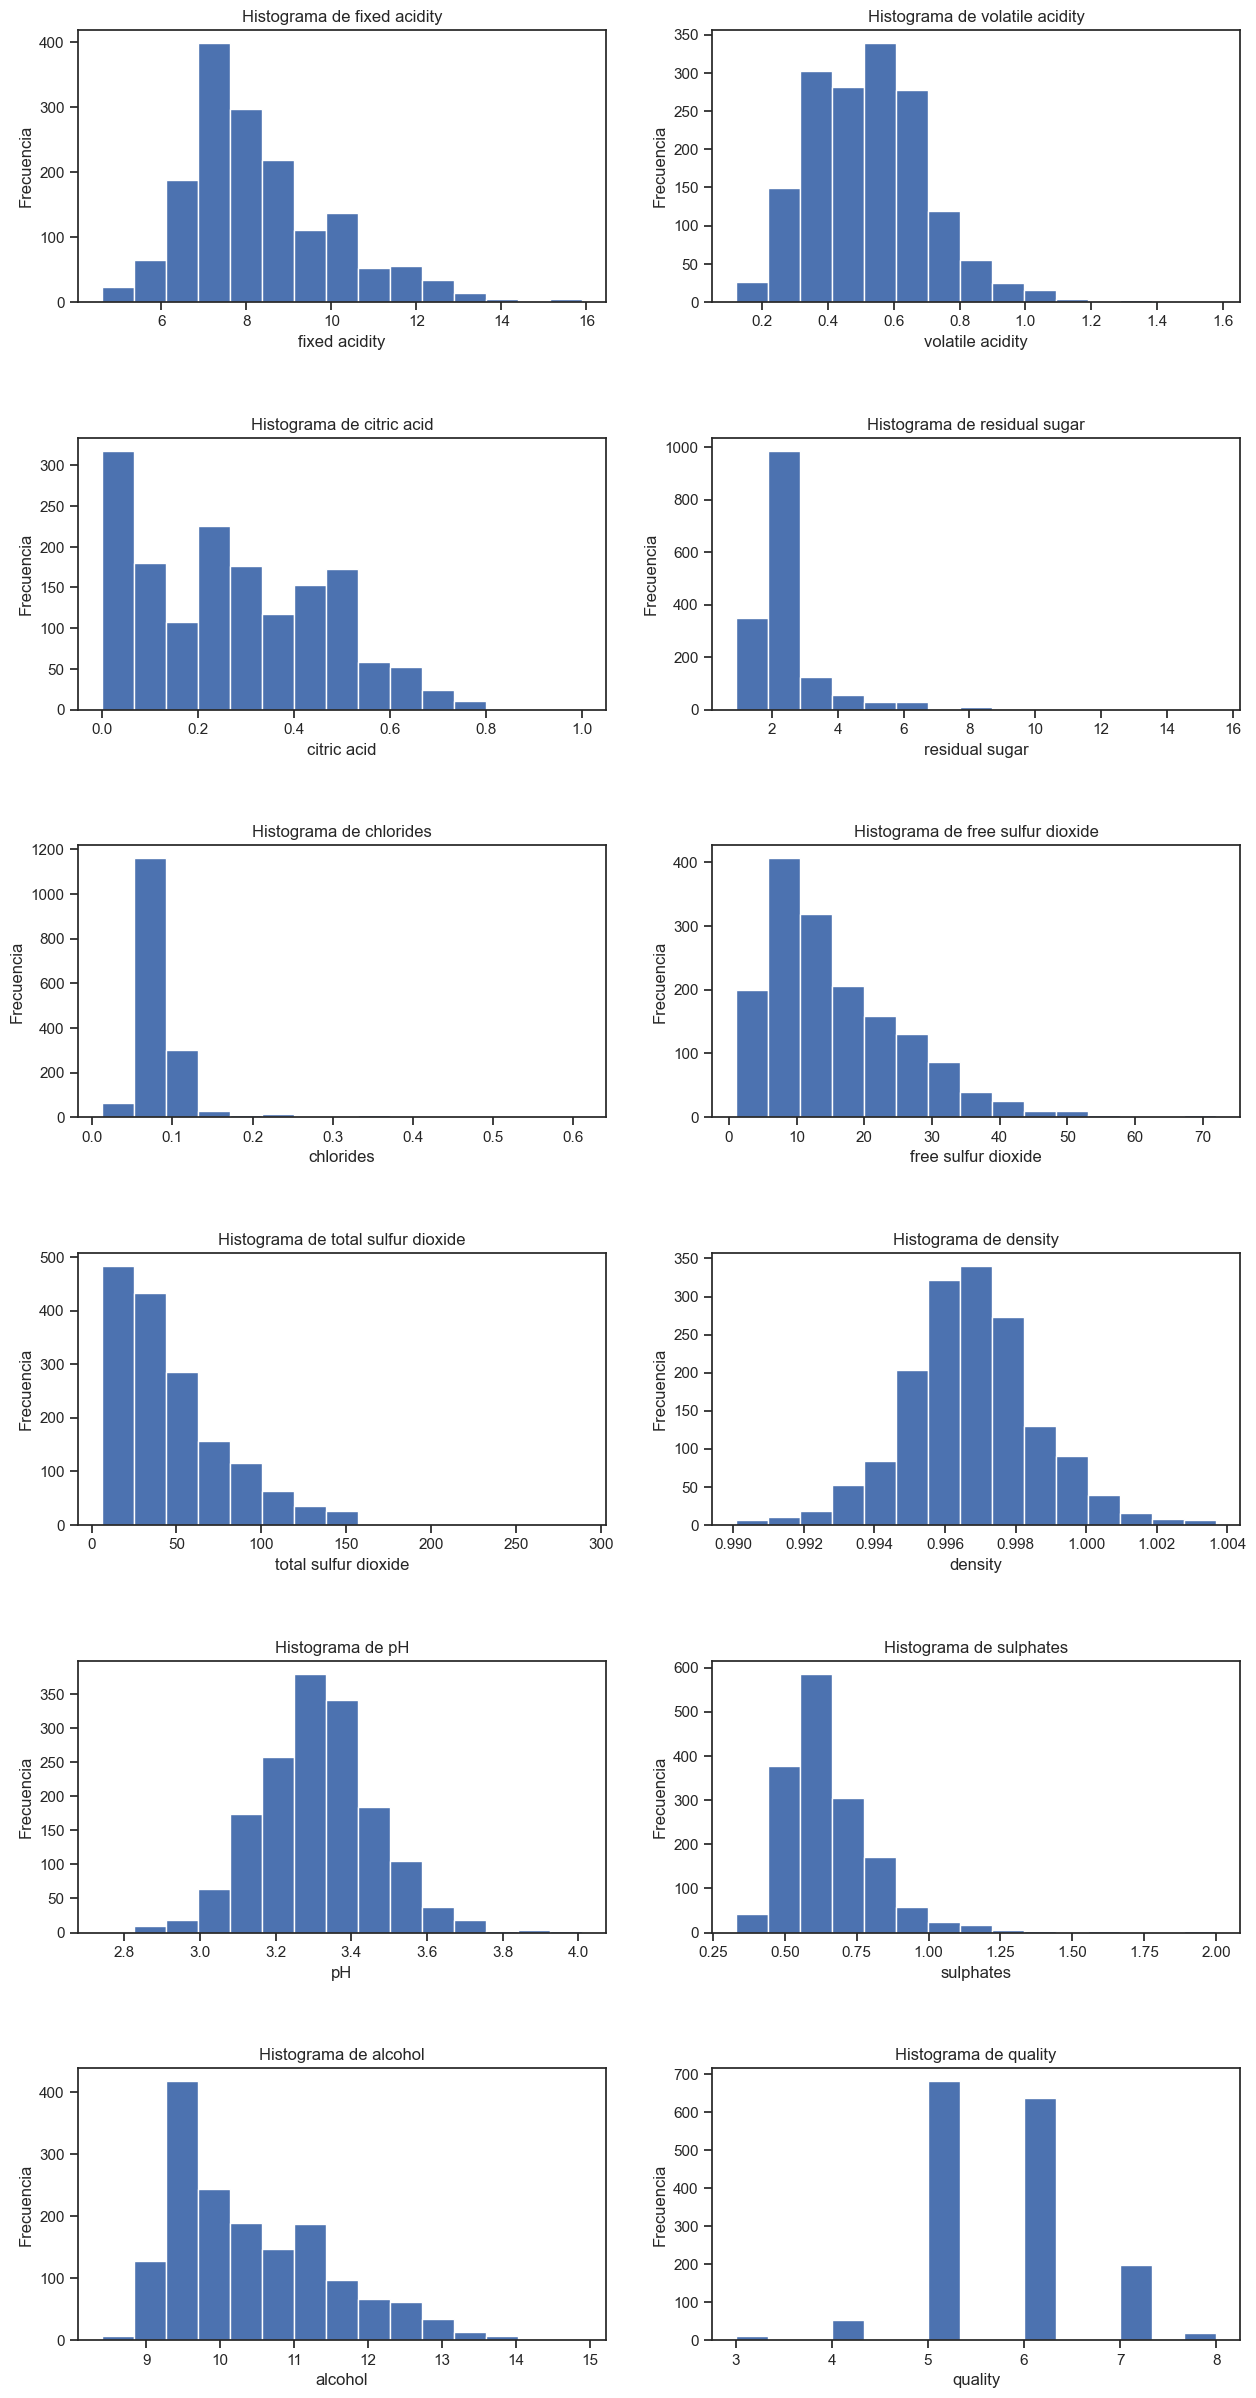

In [45]:
# Configuración de los gráficos
num_cols = len(data.columns)
num_rows = (num_cols + 1) // 2

# Subgráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))
plt.subplots_adjust(hspace=0.5)

# Iterando sobre las columnas y crear los histogramas
for i, col in enumerate(data.columns):
    ax = axes[i//2, i%2]
    ax.hist(data[col], bins=15)
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Eliminación de gráficos vacíos si el número de columnas es impar
if num_cols % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Verificación de valores nulos en el dataset

In [48]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. Seleccionar las características más relevantes para entrenar al modelo

- Característica de interés: quality

In [ ]:
predictors_col = ["alcohol", "pH", "residual sugar", "sulphates", "density"]
target_col = ['quality']

In [ ]:
predictors =data[predictors_col]
target = data[target_col]

In [ ]:
predictors

,alcohol,pH,residual sugar,sulphates,density
0,9.4,3.51,1.9,0.56,0.99780
1,9.8,3.20,2.6,0.68,0.99680
2,9.8,3.26,2.3,0.65,0.99700
3,9.8,3.16,1.9,0.58,0.99800
4,9.4,3.51,1.9,0.56,0.99780
...,...,...,...,...,...
1594,10.5,3.45,2.0,0.58,0.99490
1595,11.2,3.52,2.2,0.76,0.99512
1596,11.0,3.42,2.3,0.75,0.99574
1597,10.2,3.57,2.0,0.71,0.99547


In [ ]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


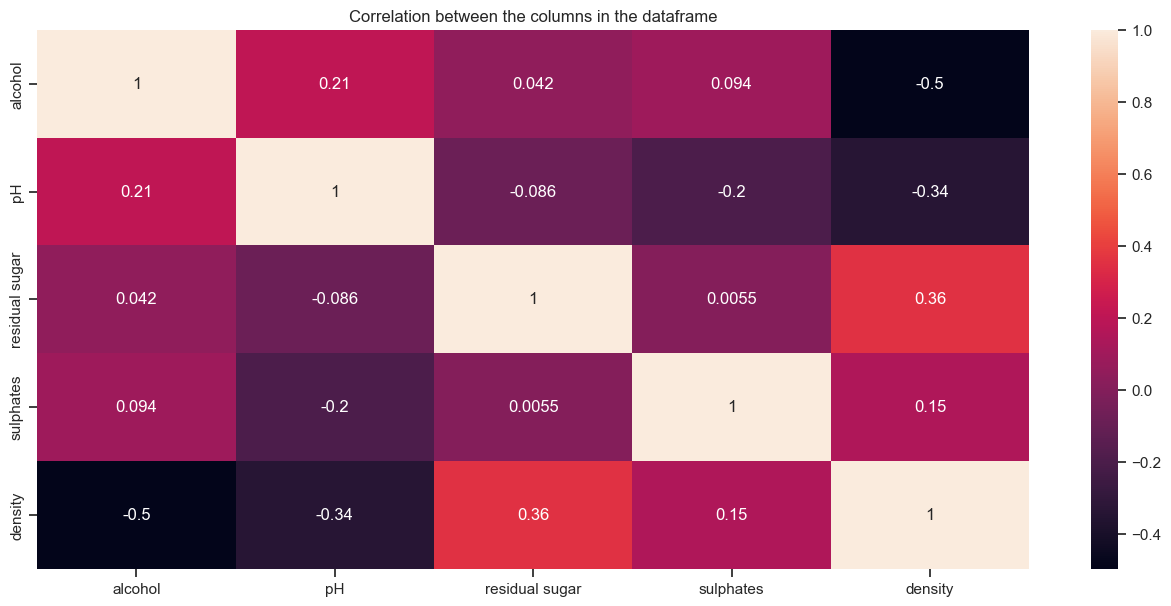

In [ ]:
plt.figure(figsize = (16,7))
sns.heatmap(predictors.corr(), annot = True)
plt.title('Correlation between the columns in the dataframe')
plt.show()

## 4. Dividir el dataset en test y train para evaluar correctamente el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [49]:
X_train

,alcohol,pH,residual sugar,sulphates,density
988,9.4,3.16,1.7,0.49,0.99596
334,11.7,3.34,2.5,0.74,0.99630
1497,11.5,3.45,2.3,0.63,0.99508
1377,12.2,3.71,2.3,0.62,0.99530
387,9.6,3.31,1.9,0.54,0.99720
...,...,...,...,...,...
742,9.2,3.46,1.9,0.65,0.99720
1552,11.3,3.51,3.7,0.66,0.99586
74,9.6,3.28,2.5,0.82,0.99840
176,9.5,3.33,2.0,0.47,0.99610


In [50]:
y_train

,quality
988,5
334,7
1497,6
1377,6
387,6
...,...
742,5
1552,6
74,5
176,5


## 5. Entrenar el modelo configurando los hiperparámetros

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
arbol = tree.fit(X_train, y_train)

[Text(0.483116147083949, 0.9791666666666666, 'x[0] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8.0, 42.0, 500.0, 487.0, 150.0, 12.0]'),
 Text(0.1929362099418175, 0.9375, 'x[3] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5.0, 27.0, 423.0, 246.0, 24.0, 0.0]'),
 Text(0.0384189139268563, 0.8958333333333334, 'x[0] <= 9.533\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.01625415589213151, 0.8541666666666666, 'x[0] <= 9.075\ngini = 0.215\nsamples = 85\nvalue = [0, 5, 75, 5, 0, 0]'),
 Text(0.005910602142593277, 0.8125, 'x[1] <= 3.19\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.0029553010712966383, 0.7708333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.008865903213889916, 0.7708333333333334, 'x[4] <= 0.998\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 1, 1, 0, 0]'),
 Text(0.005910602142593277, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.011821204285186553, 0.7291666666666666

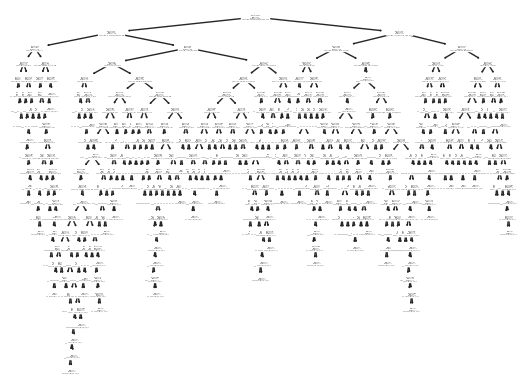

In [ ]:
plot_tree(arbol)

## 6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc

In [52]:
predicciones = arbol.predict(X_test)
predicciones

array([6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 6, 7, 6, 6, 7, 5, 5, 5, 6,
       6, 5, 5, 5, 5, 4, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       5, 3, 6, 6, 6, 6, 5, 6, 6, 5, 7, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 7,
       6, 6, 5, 6, 6, 5, 8, 6, 5, 5, 5, 5, 5, 5, 7, 7, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 6, 5, 7, 5, 6, 6, 6, 6, 5, 5, 7, 5, 5, 7, 7, 6, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 7, 7, 5, 8, 6, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6,
       4, 7, 5, 5, 7, 5, 6, 7, 6, 5, 6, 7, 6, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 4, 5, 5, 6, 5, 6, 7, 6, 4, 6, 8, 5, 4, 6, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 7, 5, 7, 7, 5, 7,
       5, 7, 6, 6, 7, 6, 5, 4, 4, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       4, 5, 5, 6, 8, 6, 5, 6, 6, 6, 5, 5, 6, 6, 3, 8, 5, 6, 5, 7, 7, 5,
       6, 6, 6, 7, 5, 5, 8, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       6, 7, 5, 5, 6, 6, 5, 4, 5, 6, 5, 6, 5, 5, 5,

In [59]:
precision = accuracy_score(y_test, predicciones)
precision_clase = precision_score(y_test, predicciones, average=None)

print("Precisión del modelo:", precision)
print("Precisión por clase:", precision_clase)


Precisión del modelo: 0.555
Precisión por clase: [0.         0.2        0.64942529 0.54248366 0.5        0.        ]


In [60]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,1,0,0
4,1,3,6,0,1,0
5,2,6,113,53,5,2
6,0,5,45,83,14,4
7,0,1,9,13,23,3
8,0,0,0,3,3,0


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

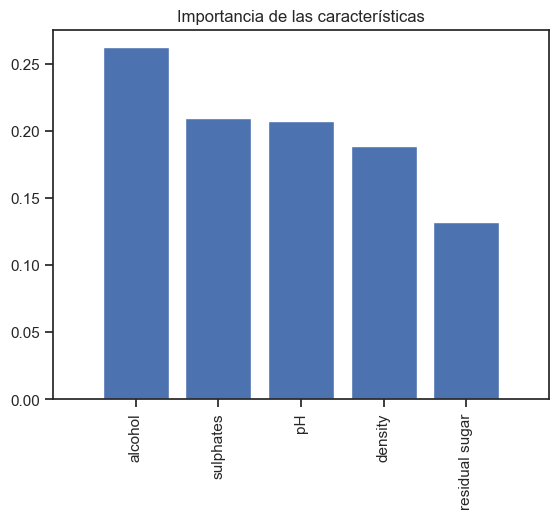

In [51]:
importances = arbol.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), predictors.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos.

**Precisión del modelo:** La precisión general del modelo es del 55.5%. Esto significa que el 55.5% de las predicciones realizadas por el modelo fueron correctas en el conjunto de prueba.

**Precisión por clase:** 
- Clase 0: La precisión para esta clase es del 0%. Esto sugiere que el modelo no pudo predecir correctamente ninguna instancia de esta clase en el conjunto de prueba.
- Clase 1: La precisión para esta clase es del 20%. Esto indica que el modelo predijo correctamente el 20% de las instancias de esta clase en el conjunto de prueba.
- Clase 2: La precisión para esta clase es del 64.9%. Esto sugiere que el modelo predijo correctamente aproximadamente el 64.9% de las instancias de esta clase en el conjunto de prueba.
- Clase 3: La precisión para esta clase es del 54.2%. Esto indica que el modelo predijo correctamente el 54.2% de las instancias de esta clase en el conjunto de prueba.
- Clase 4: La precisión para esta clase es del 50%. Esto sugiere que el modelo predijo correctamente el 50% de las instancias de esta clase en el conjunto de prueba.
- Clase 5: La precisión para esta clase es del 0%. Esto indica que el modelo no pudo predecir correctamente ninguna instancia de esta clase en el conjunto de prueba.